# 구별 지가지수

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [9]:
df = pd.read_csv('../data/preprocessed/12_district_split.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_63076/1775475150.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/12_district_split.csv')


In [10]:
district_list = df['구'].unique().tolist()

In [19]:
district_list

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

## 1. 원본 데이터를 구에 맞춰 분할한다.

In [16]:
df_split_list = []

for district in district_list:
    df_split_list.append(df[df['구'] == district])

In [17]:
df_split_list[0]

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,GDP,한국은행 기준금리,기대 인플레이션,지가지수,아파트 인허가,미분양,거래량,건설사 랭킹,구,동
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,1623074.1,1.5,2.5,77.794,74984.0,45.0,13740.0,2.0,강남구,개포동
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,1623074.1,1.5,2.5,77.794,74984.0,45.0,13740.0,2.0,강남구,개포동
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,1623074.1,1.5,2.5,77.794,74984.0,45.0,13740.0,2.0,강남구,개포동
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,1725373.4,1.5,2.6,78.143,32848.0,45.0,15107.0,2.0,강남구,개포동
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,1725373.4,1.5,2.6,78.143,32848.0,45.0,15107.0,2.0,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123928,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,12,7,2021,...,1712792.9,3.5,3.3,99.133,34043.0,976.0,6716.0,1.0,강남구,일원동
1123929,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,19,6,2021,...,1712792.9,3.5,3.3,99.133,34043.0,976.0,6716.0,1.0,강남구,일원동
1123930,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,31,9,2021,...,1712792.9,3.5,3.3,99.133,34043.0,976.0,6716.0,1.0,강남구,일원동
1123931,서울특별시 강남구 일원동,734,734.0,0.0,상록수,74.54,202307,7,3,1993,...,1712792.9,3.5,3.3,98.993,34043.0,1081.0,6081.0,1.0,강남구,일원동


In [18]:
df_split_list[-1]

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,GDP,한국은행 기준금리,기대 인플레이션,지가지수,아파트 인허가,미분양,거래량,건설사 랭킹,구,동
93439,서울특별시 중랑구 망우동,577,577.0,0.0,예성그린캐슬,58.90,201711,1,1,2004,...,1623074.1,1.5,2.5,77.523,74984.0,68.0,12041.0,2.0,중랑구,망우동
93440,서울특별시 중랑구 망우동,577,577.0,0.0,예성그린캐슬,58.90,201711,7,19,2004,...,1623074.1,1.5,2.5,77.523,74984.0,68.0,12041.0,2.0,중랑구,망우동
93441,서울특별시 중랑구 망우동,577,577.0,0.0,예성그린캐슬,84.83,201801,12,9,2004,...,1725373.4,1.5,2.6,78.143,32848.0,45.0,15107.0,2.0,중랑구,망우동
93442,서울특별시 중랑구 망우동,577,577.0,0.0,예성그린캐슬,84.83,201801,22,11,2004,...,1725373.4,1.5,2.6,78.143,32848.0,45.0,15107.0,2.0,중랑구,망우동
93443,서울특별시 중랑구 망우동,577,577.0,0.0,예성그린캐슬,84.83,201801,22,12,2004,...,1725373.4,1.5,2.6,78.143,32848.0,45.0,15107.0,2.0,중랑구,망우동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,1712792.9,3.5,3.3,98.993,34043.0,1081.0,6081.0,1.0,중랑구,신내동
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,1712792.9,3.5,3.3,98.993,34043.0,1081.0,6081.0,1.0,중랑구,신내동
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,1712792.9,3.5,3.3,99.133,34043.0,976.0,6716.0,1.0,중랑구,신내동
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,1712792.9,3.5,3.3,99.324,34043.0,914.0,6396.0,1.0,중랑구,신내동


## 2. 구별 지가지수 데이터

In [20]:
land_value_df_list = []

for idx, district in enumerate(district_list):
    idx += 1
    land_value_df_list.append(pd.read_excel(f'../data/added_features/지역별_지가지수/{idx}_{district}.xlsx'))

In [21]:
land_value_df_list[0]

,구분,'07.01,Unnamed: 2,'07.02,Unnamed: 4,'07.03,Unnamed: 6,'07.04,Unnamed: 8,'07.05,...,'24.01,Unnamed: 410,'24.02,Unnamed: 412,'24.03,Unnamed: 414,'24.04,Unnamed: 416,'24.05,Unnamed: 418
0,NaN,지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,...,지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비)
1,주거,58.803,0.34,59.023,0.38,59.18,0.27,59.302,0.21,59.432,...,100.169,0.17,100.368,0.2,100.737,0.37,101.117,0.38,101.465,0.34


### 지가지수 데이터 전처리

In [22]:
def preprocess(df_tmp):
    drop_col = [f'Unnamed: {i}' for i in range(2, 420, 2)]
    df_tmp.drop(drop_col, axis=1, inplace=True)
    df_tmp.drop(['구분'], axis=1, inplace=True)

    cols = df_tmp.columns
    cols = [col.replace('\'', '') for col in cols]
    cols = [int('20'+col.replace('.', '')) for col in cols]
    df_tmp.columns = cols

    re = pd.DataFrame(df_tmp.iloc[1]).reset_index()
    re.columns = ['년월', '지가지수']

    return re

In [23]:
for i in range(25):
    land_value_df_list[i] = preprocess(land_value_df_list[i])

In [24]:
# 강남구
land_value_df_list[0]

,년월,지가지수
0,200701,58.803
1,200702,59.023
2,200703,59.18
3,200704,59.302
4,200705,59.432
...,...,...
204,202401,100.169
205,202402,100.368
206,202403,100.737
207,202404,101.117


In [25]:
# 중랑구
land_value_df_list[-1]

,년월,지가지수
0,200701,69.058
1,200702,69.221
2,200703,69.419
3,200704,69.58
4,200705,69.729
...,...,...
204,202401,100.131
205,202402,100.26
206,202403,100.39
207,202404,100.526


In [26]:
# 강서구
land_value_df_list[3]

,년월,지가지수
0,200701,62.836
1,200702,63.092
2,200703,63.32
3,200704,63.555
4,200705,63.74
...,...,...
204,202401,100.143
205,202402,100.299
206,202403,100.45
207,202404,100.597


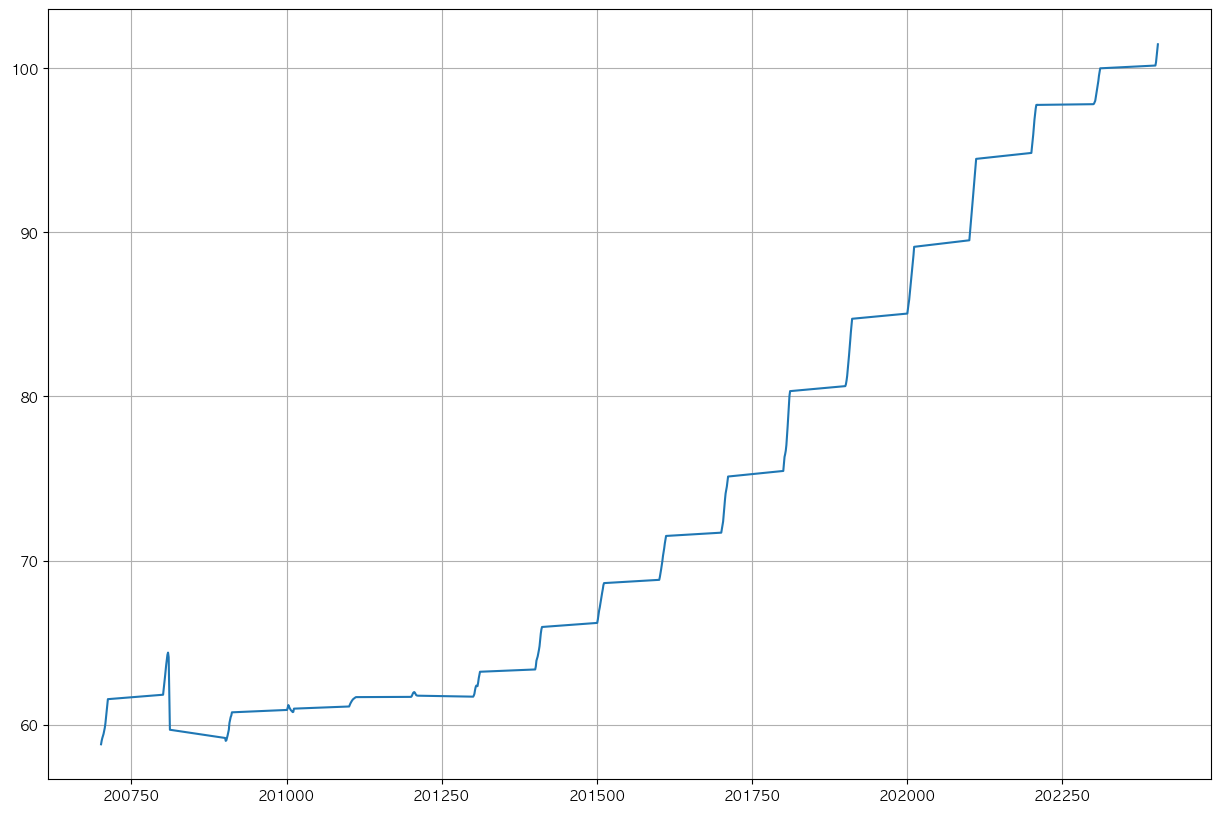

In [27]:
plt.figure(figsize=(15, 10))
plt.plot(land_value_df_list[0]['년월'], land_value_df_list[0]['지가지수'])
plt.grid(True)
plt.show()

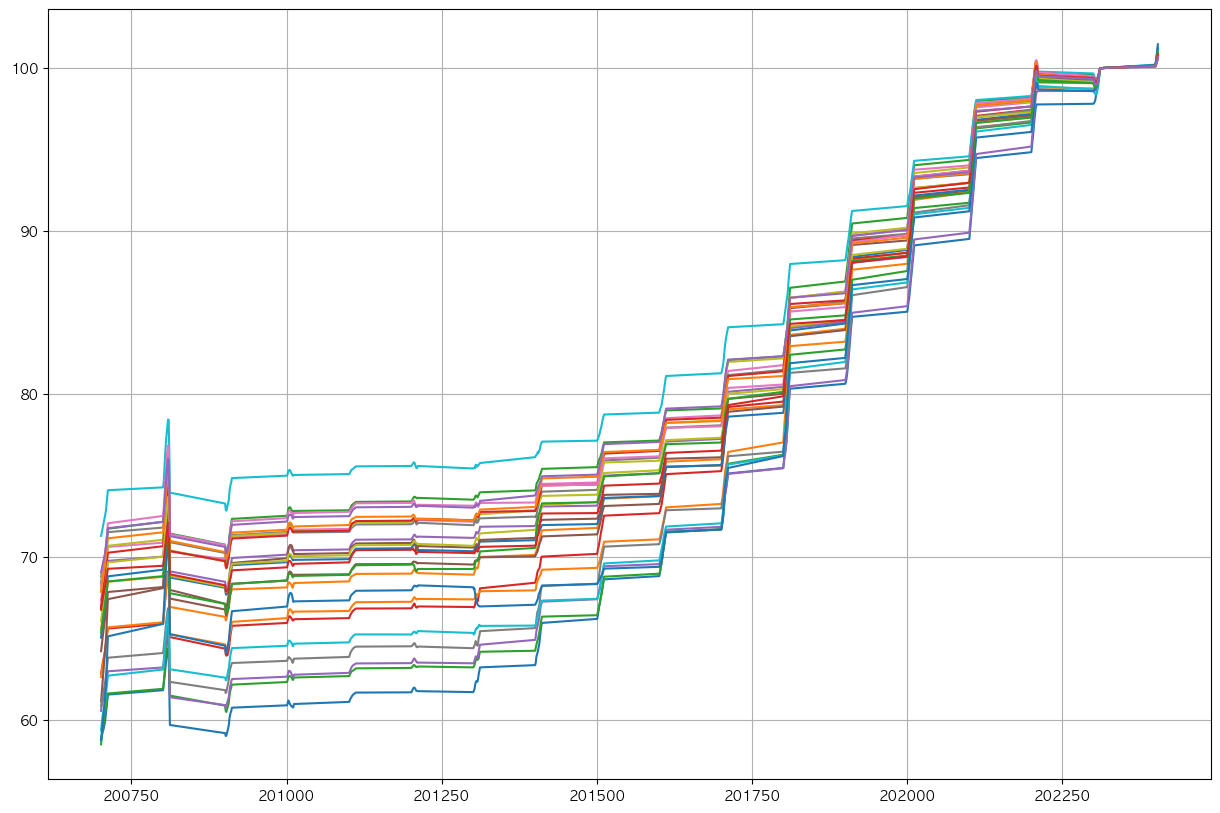

In [28]:
plt.figure(figsize=(15, 10))
for i in range(25):
    plt.plot(land_value_df_list[i]['년월'], land_value_df_list[i]['지가지수'])
plt.grid(True)
plt.show()

# 원본 데이터에 적용

In [33]:
def mapping(land_value_df, origin_df):
    land_value_mapping = pd.Series({ym: price for ym, price in zip(land_value_df['년월'], land_value_df['지가지수'])})

    origin_df['구별 지가지수'] = np.nan
    origin_df['구별 지가지수'] = origin_df['구별 지가지수'].fillna(origin_df['계약년월']).map(land_value_mapping)

    return origin_df

In [34]:
for i in range(25):
    df_split_list[i] = mapping(land_value_df_list[i], df_split_list[i])

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_63076/1400209780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin_df['구별 지가지수'] = np.nan
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_63076/1400209780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin_df['구별 지가지수'] = origin_df['구별 지가지수'].fillna(origin_df['계약년월']).map(land_value_mapping)
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_63076/1400209780.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [36]:
# 강남구
df_split_list[0][['계약년월', '구', '구별 지가지수']]

,계약년월,구,구별 지가지수
0,201712,강남구,75.121
1,201712,강남구,75.121
2,201712,강남구,75.121
3,201801,강남구,75.461
4,201801,강남구,75.461
...,...,...,...
1123928,202308,강남구,98.962
1123929,202308,강남구,98.962
1123930,202308,강남구,98.962
1123931,202307,강남구,98.705


In [37]:
# 중랑구
df_split_list[-1][['계약년월', '구', '구별 지가지수']]

,계약년월,구,구별 지가지수
93439,201711,중랑구,81.869
93440,201711,중랑구,81.869
93441,201801,중랑구,82.323
93442,201801,중랑구,82.323
93443,201801,중랑구,82.323
...,...,...,...
1128089,202307,중랑구,99.019
1128090,202307,중랑구,99.019
1128091,202308,중랑구,99.123
1128092,202309,중랑구,99.328


In [38]:
df = pd.concat([df_splited for df_splited in df_split_list]).sort_index()

In [39]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,한국은행 기준금리,기대 인플레이션,지가지수,아파트 인허가,미분양,거래량,건설사 랭킹,구,동,구별 지가지수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,1.5,2.5,77.794,74984.0,45.0,13740.0,2.0,강남구,개포동,75.121
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,1.5,2.5,77.794,74984.0,45.0,13740.0,2.0,강남구,개포동,75.121
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,1.5,2.5,77.794,74984.0,45.0,13740.0,2.0,강남구,개포동,75.121
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,1.5,2.6,78.143,32848.0,45.0,15107.0,2.0,강남구,개포동,75.461
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,1.5,2.6,78.143,32848.0,45.0,15107.0,2.0,강남구,개포동,75.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,3.5,3.3,98.993,34043.0,1081.0,6081.0,1.0,중랑구,신내동,99.019
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,3.5,3.3,98.993,34043.0,1081.0,6081.0,1.0,중랑구,신내동,99.019
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,3.5,3.3,99.133,34043.0,976.0,6716.0,1.0,중랑구,신내동,99.123
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,3.5,3.3,99.324,34043.0,914.0,6396.0,1.0,중랑구,신내동,99.328


In [42]:
df.to_csv('../data/preprocessed/13_land_value_per_district.csv', index=False)